# MA5790 - Assignment 5 - MM15B022 - R Mythreyi

In [1]:
%load_ext tikzmagic

The tikzmagic module is not an IPython extension.


In [2]:
%matplotlib inline

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Question 1

Legendre Nodes

### Solution

Monic Legendre Polynomials solve the differential equation:
$$
\dfrac{d(1-x^2)}{dx}\dfrac{d}{dx}q_n + n(n+1)q_n = 0
$$
This can be solved using orthogonality to give:
$$
q_n = \sum_{k=0}^{\lfloor n/2 \rfloor} (-1)^k a_k x^{n-2k}\;\;, a_0 = 1 \; \&\; a_k = \dfrac{n!^2}{k! (n-k)! (n-2k)!}\dfrac{(2n-2k)!}{(2n)!}
$$
It can be proved that for a set of orthoginal monic polynomials, there's a sequence of $c_n$'s and $d_n$'s such that:
$$
q_{n+1}(x) = (x-c_n) q_n(x) - b_n q_{n-1}(x) \text{ where } c_n = \dfrac{\langle xq_n, q_n \rangle}{\|q_n\|^2} \text{ and } d_n = \dfrac{\|q_n\|^2}{\|p_{n-1}\|^2}
$$
Hence, due to symmetry around $x=0$,
$$
q_{n+1}(x) = xq_n(x) - d_nq_{n-1}
$$

Since each $q_n$ is monic, $d_n =  \text{ [coefficient of }x^{n-1} \text{ in }q_{n+1} \text{]} -  \text{ [coefficient of }x^{n-2} \text{ in }q_{n} \text{]}$
From the formula for the coefficients above ($a_k$'s), 
$$
d_n = \left[ \dfrac{n(n+1)}{2(2n+1)} - \dfrac{n(n-1)}{2(2n-1)} \right] = \dfrac{n^2}{4n^2-1}
$$

Minimising $\|p(x)\|_2^2$ leads to "Least squares" approximation. When getting least squares for a given function, one way is to solve a system of equations which is ill-conditioned (the Hilbert matrix). The other way is to use orthogonal polynomials. When using orthogonal polnomials, the error term comes out to be related to the weight function involved in the orthogonalisation. The weight function for Legendre polynomials is 1 (independent of $x$). Hence, if $\int_{-1}^1(p(x))^2 \text{d}x $ is minimised by $p(x)$, $p(x) = q_n(x)$.If we take $p(x)$ to be the lagrangian polynomial interpolation for a given function, to minimise least squares, the interpolation must be performed on the Legendre nodes (roots of Legendre polynomials).

Legendre 0.6009615384615387 for 3 nodes.
Legendre 0.7048872180451127 for 4 nodes.
Legendre 0.4297186546024606 for 5 nodes.
Legendre 0.514467653566537 for 6 nodes.
Legendre 0.3156708505597009 for 7 nodes.
Legendre 0.3598111816189339 for 8 nodes.
Legendre 0.232086053617068 for 9 nodes.
Legendre 0.2463838853559671 for 10 nodes.
Legendre 0.1694869604658443 for 11 nodes.
Legendre 0.16703451964186677 for 12 nodes.
Legendre 0.12273899123329296 for 13 nodes.
Legendre 0.11271630667442334 for 14 nodes.
Legendre 0.0881768346183839 for 15 nodes.
Legendre 0.0758997973843889 for 16 nodes.
Legendre 0.06290425650896653 for 17 nodes.
Legendre 0.051058441527643605 for 18 nodes.
Legendre 0.04460844130152435 for 19 nodes.
Legendre 0.03433177524315023 for 20 nodes.
Legendre 0.03147566732332026 for 21 nodes.


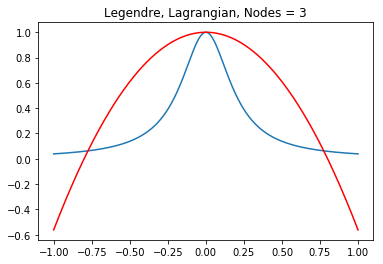

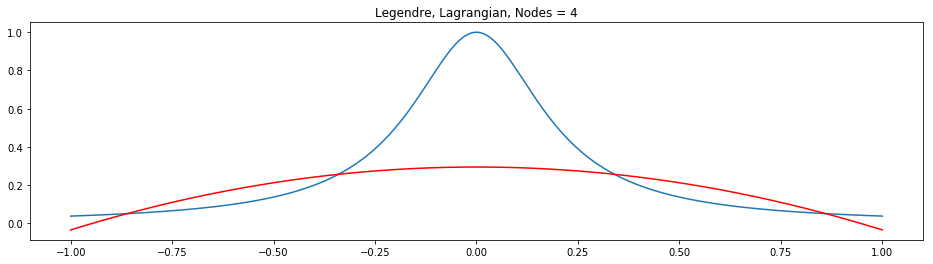

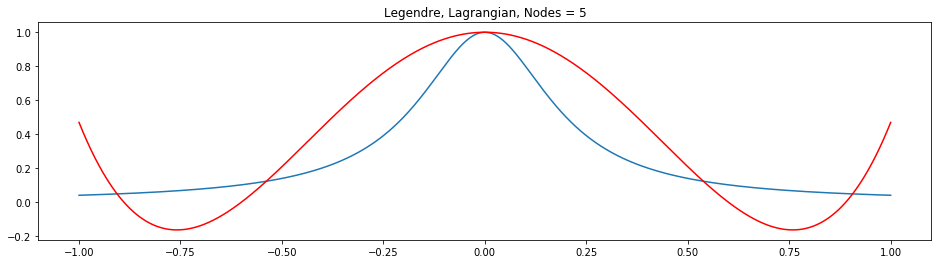

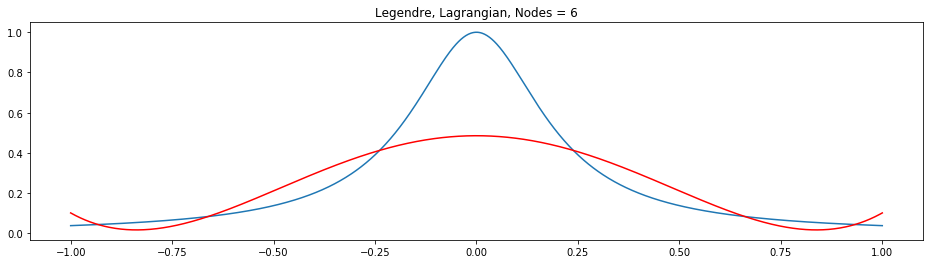

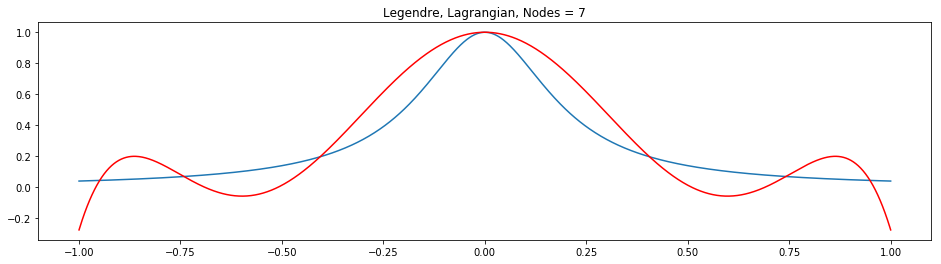

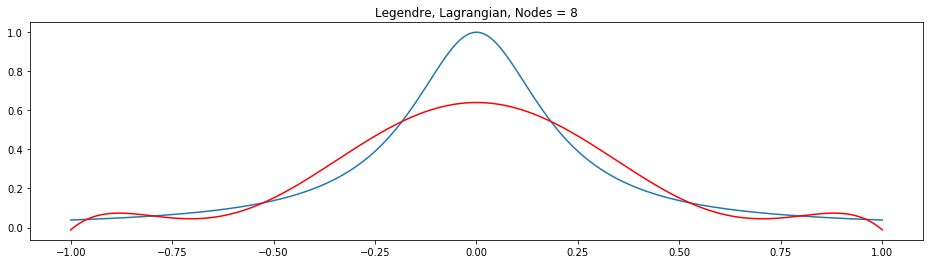

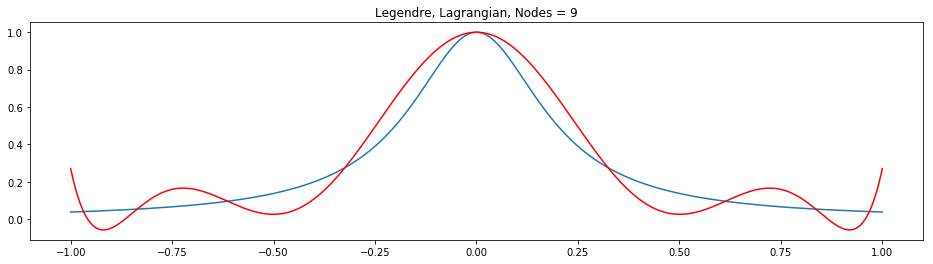

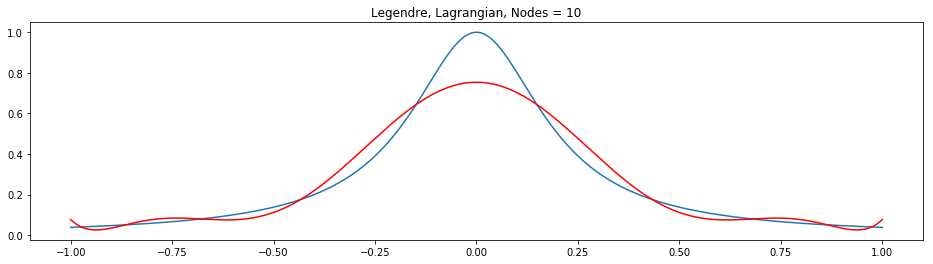

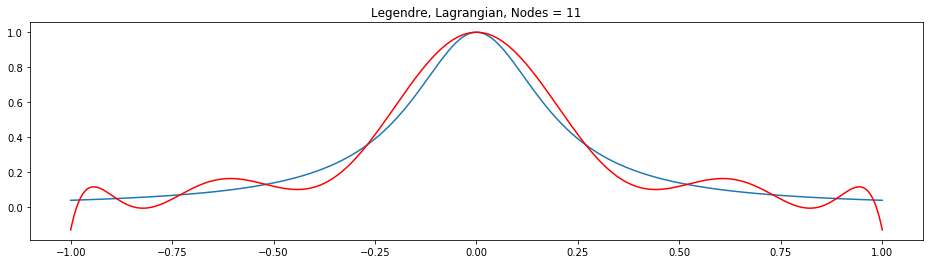

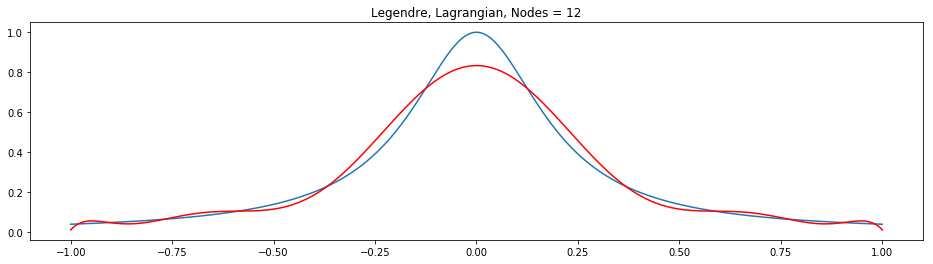

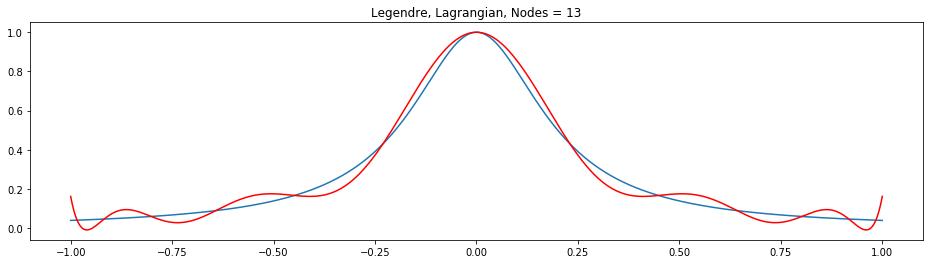

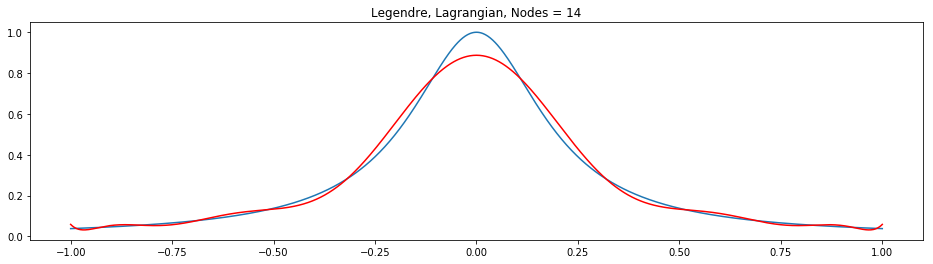

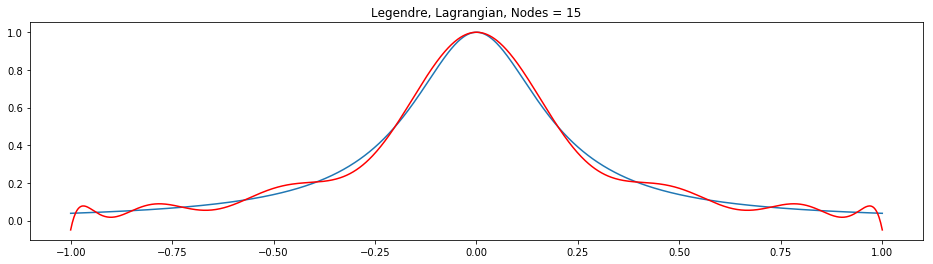

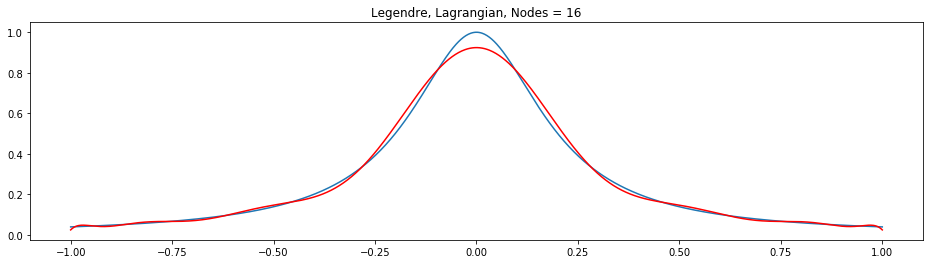

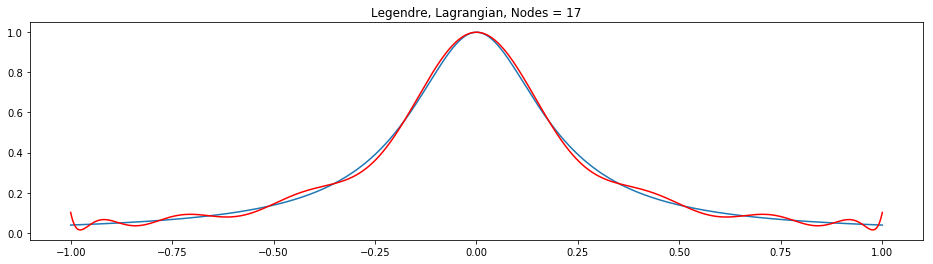

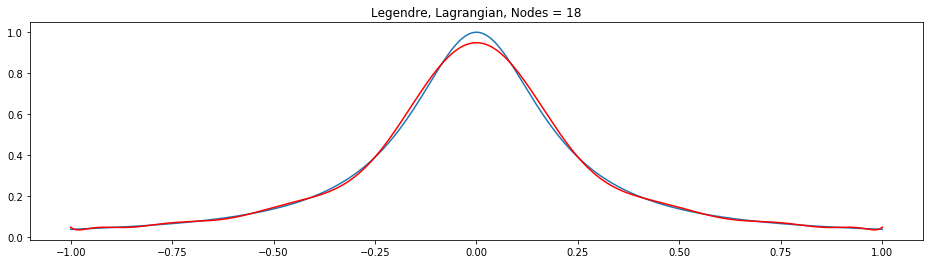

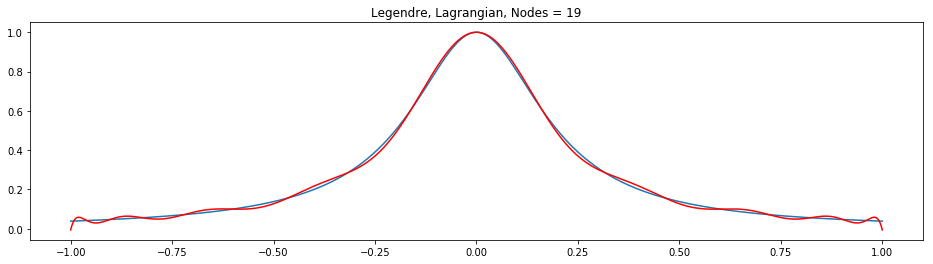

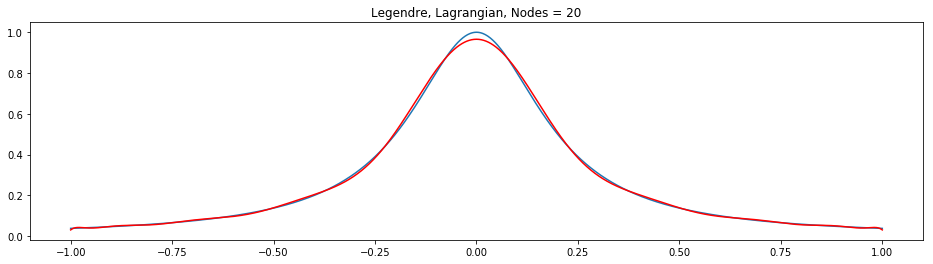

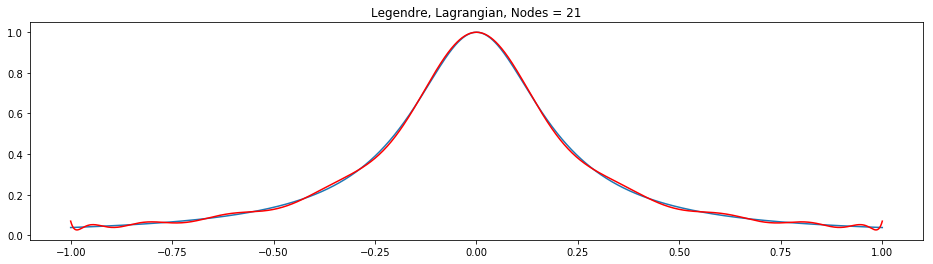

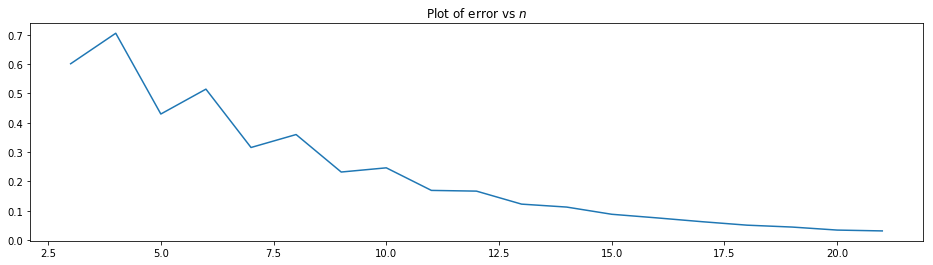

In [4]:
# Lagrangian Interpolation using Legendre Nodes

import scipy as sp;
import numpy as np;
import numpy.polynomial.legendre as leg
import matplotlib.pylab as pl;

def function(x):
    f = 1.0/(1+25*x*x);
    return f;

def Lagrange(xnodes,x,i):
    f = 1;
    nnodes = np.size(xnodes);
    for j in range(0,i):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    for j in range(i+1,nnodes):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    return f;

def Legendre(nnodes,xplot):
    # Legendre node interpolation using fundamental Lagrangian polynomials
    c = np.zeros(nnodes+1); c[nnodes]=1;
    xnodes    = leg.legroots(c);
    fnodes     = function(xnodes);
    fplot        = 0;
    for i in range(0,nnodes):
        fplot = fplot + fnodes[i]*Lagrange(xnodes,xplot,i);
    return xnodes, fnodes, fplot;

nplot       = 1001;
xplot       = np.linspace(-1,1,nplot);
f_actual   = function(xplot);
nnodes_all    = list(range(3,22));
error = np.zeros(len(nnodes_all));
i=0
for nnodes in nnodes_all:
    xnodes, fnodes, fplot = Legendre(nnodes,xplot);
    error[i]       = np.amax(np.abs(f_actual-fplot));
    print("Legendre",error[i],"for",nnodes,"nodes.")
    i=i+1
    pl.figure()
    pl.plot(xplot,f_actual,'-');
    pl.title("Legendre, Lagrangian, Nodes = %i" %nnodes)
    pl.plot(xplot,fplot,'r');
    pl.rcParams["figure.figsize"] = [16,4];

pl.figure()
pl.plot(nnodes_all,error,'-');
pl.title("Plot of error vs $n$");


## Question 2

Chebyshev Nodes

### Solution

Proving the recurrence relation:
$$
T_{n+1} = 2x T_{n} - T_{n-1}\;\;\; ; T_0 = 1,\;\; T_1 = x
$$
Given
$$
T_{n}(x) = \cos(n \cos^{-1}(x))
$$

$$
\begin{align*}
\text{RHS} & =2x \cos(n(\cos^{-1}(x)) - \cos((n-1)\cos^{-1}(x)) \\
&= 2x \cos(n(\cos^{-1}(x)) - \cos(n\cos^{-1}(x) -\cos^{-1}(x)) \\
&= 2x \cos(n(\cos^{-1}(x)) - x\cos(n\cos^{-1}(x)) - \sin(n\cos^{-1}(x))\sin(\cos^{-1}(x)) \\
&= x \cos(n(\cos^{-1}(x)) - \sin(n\cos^{-1}(x))\sin(\cos^{-1}(x)) \\
&= \cos(\cos^{-1}(x) \cos(n(\cos^{-1}(x)) - \sin(n\cos^{-1}(x))\sin(\cos^{-1}(x)) \\
&= \cos(n(\cos^{-1}(x) + \cos^{-1}(x)) \\
&= \cos((n+1) \cos^{-1}(x)) \\
&= T_{n+1}
\end{align*}
$$

Using the recurrence relation,
$$
T_2 = 2x(x) - 1 = 2x^2 - 1 \\
T_3 = 2x(2x^2 - 1) - x = 2^2x^3 - 3x \\
\vdots
$$
Since each polynomial is multiplied with $2x$ to get the next polynomial, $T_n(x)$ is a polynomial of degree $n$ with leading coefficient $2^{n-1}$

$$
T_{n+1}(x) = \cos((n+1)\cos^{-1}(x)) \\
T_{n+1}(x) = 0\;\implies \cos((n+1)\cos^{-1}(x))=0 \\
\text{or } (n+1)\cos^{-1}(x) = (2k+1)\dfrac{\pi}{2} \; \forall k \in \{0,1,2,\ldots,n\} \\
\text{i.e. } x_k = \cos\left(\dfrac{2k+1}{2n+2}\pi\right)
$$
Since $\cos$ is a continuous function with values in $[-1,1]$, the $n+1$ roots of $T_{n+1}(x)$ lies in $[-1,1]$, therefore the function alternates between $\pm 1$ ($n+1$) times in the interval $[-1,1]$.

The given polynomial 
$$
\prod_{k=0}^n \left(x-x_k\right)
$$
is nothing but the normalised form of $T_{n+1}(x)$, whose leading coefficient is $\dfrac{1}{2^n}$. 
Therefore, since we know

$$
|T_{n+1}(x)| \leq 1,\; \left|\prod_{k=0}^n \left(x-x_k\right)\right| \leq \dfrac{1}{2^n} \; \forall x \in [-1,1]
$$

The polynomial $T_{n+1}(x)$ attains 0's at the points $x_k$. However, the polynomial attains maximal value of  $\pm1$ at the following $(n+2)$ points:
$$
z_k = \cos\left(\dfrac{k\pi}{n+1}\right) \;\; \forall k \in \{0,1,2,\ldots,n+1\}
$$

Considering the polynomial 
$$
F(x) = \prod_{k=0}^n \left(x-y_k\right) - \dfrac{T_{n+1}(x)}{2^n}
$$
We can see that there are $(n+2)$ roots for a polynomial of degree $n+1$. Therefore, the Chebyshev nodes minimises:
$$
\max_{x\in[-1,1]} \left|\prod_{k=0}^n \left(x-x_k\right)\right|
$$